In [74]:
# Supervised Learning divided into classificaion and regression

# Importing data and dependencies 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

### importing the dataset

In [76]:
df=pd.read_csv("housing.csv")

# Data Eyeballing

In [77]:
df.shape

(20640, 10)

In [78]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
number_df=df.select_dtypes(include='number')
number_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# Data Cleaning

In [84]:
df.dropna(inplace=True) #drops rows with null values
df.shape

(20433, 10)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# EDA

<Axes: >

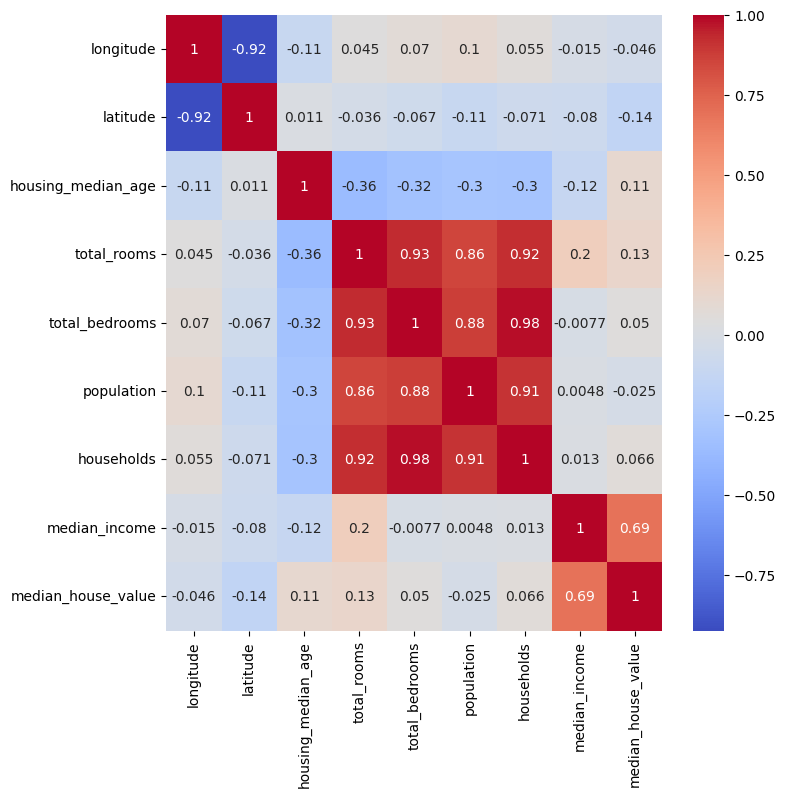

In [86]:
plt.figure(figsize=(8,8))
sns.heatmap(number_df.corr(), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

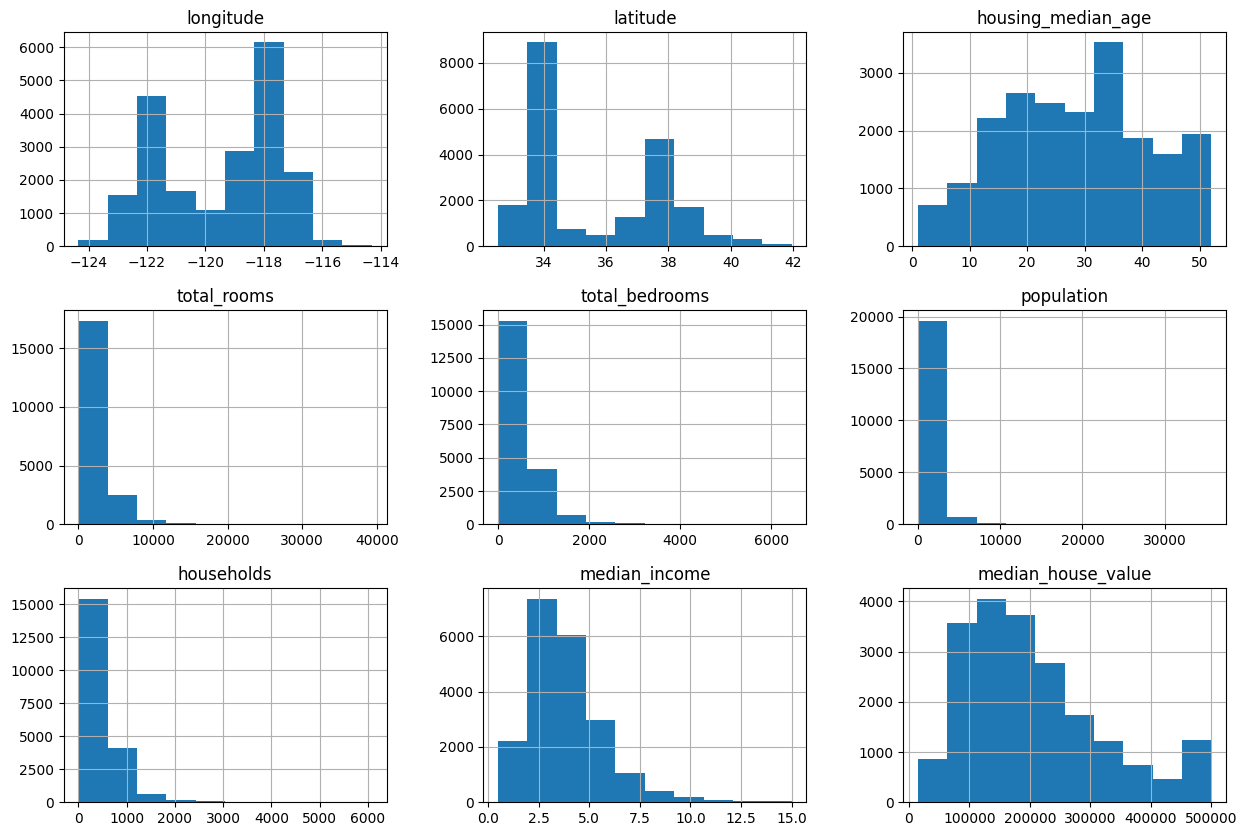

In [87]:
df.hist(figsize=(15,10))

# Splitting Predictors and Target

In [88]:
X = df.drop(columns=['median_house_value','ocean_proximity'],axis=1)
y=df['median_house_value']

In [89]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [90]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# Train_Test_Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [92]:
train_data=X_train.join(y_train) #shows the final training data with X_train and y_train
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0
...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0


# EDA for training data (Data Exploration)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

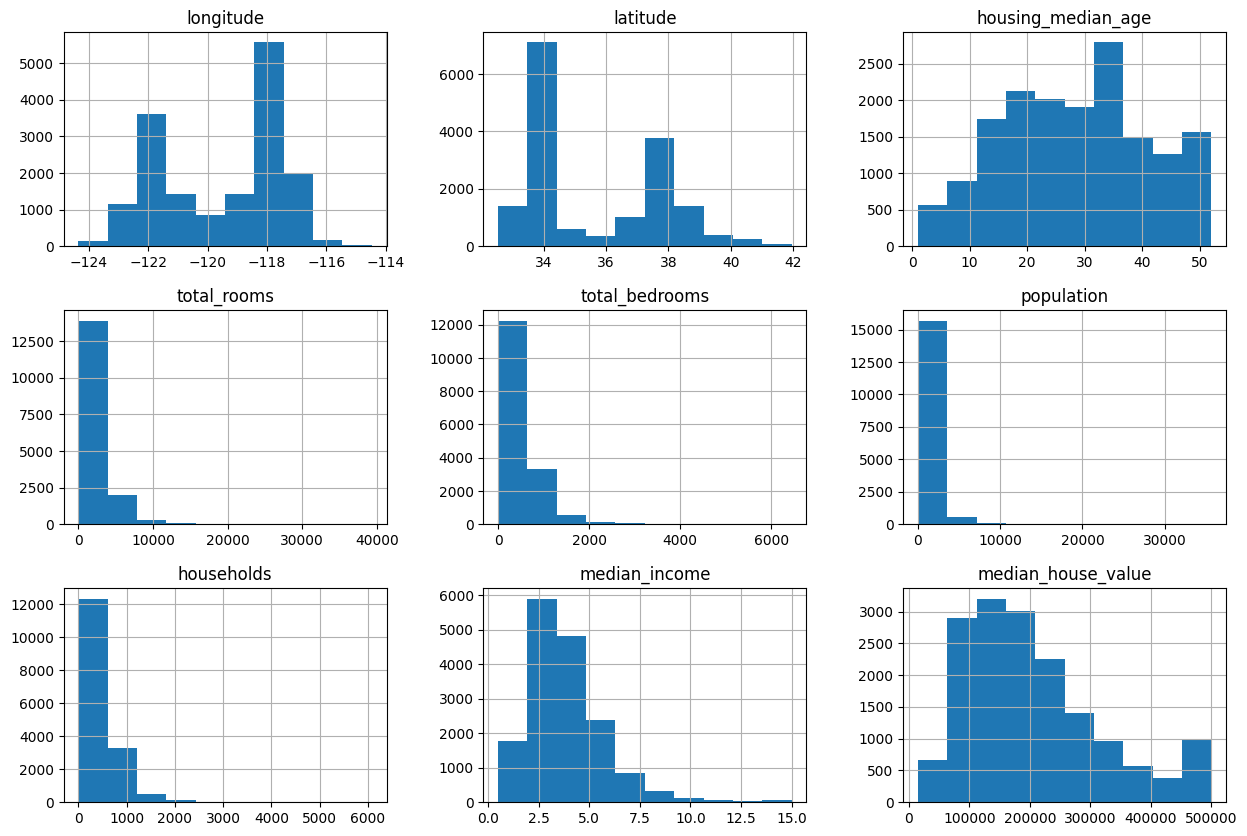

In [93]:
train_data.hist(figsize=(15,10))

<Figure size 2000x1500 with 0 Axes>

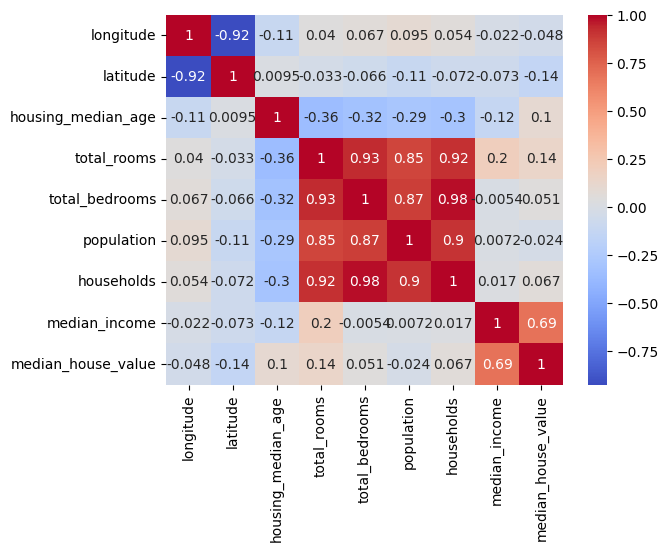

<Figure size 2000x1500 with 0 Axes>

In [94]:
numberic_df=train_data.select_dtypes(include='number')
sns.heatmap(numberic_df.corr(),annot=True,cmap="coolwarm")
plt.figure(figsize=(20,15))

<Axes: xlabel='latitude', ylabel='longitude'>

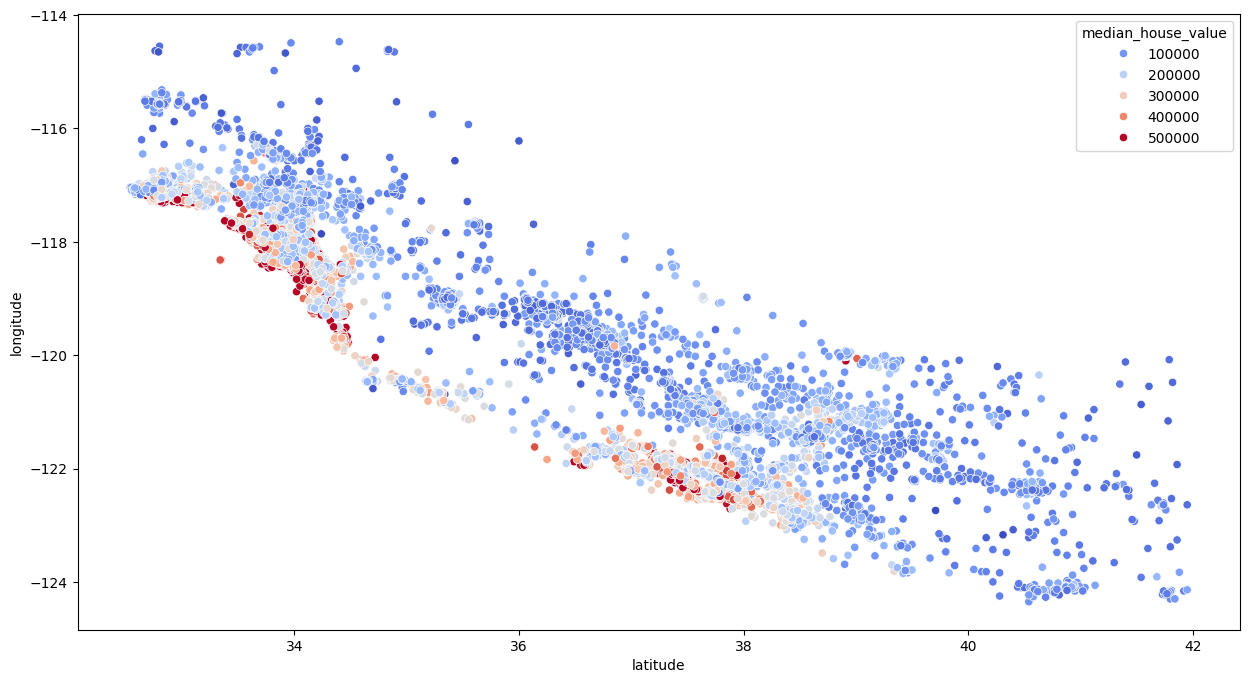

In [97]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue="median_house_value",palette="coolwarm")

# Training the Linear Regression Model


In [98]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred=model.predict(X_test)

In [100]:
y_pred

array([197058.03752155, 157508.79088917, 202099.26270386, ...,
       131098.67538846, 155468.78077783, 166363.59962367])

In [101]:
y_test

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
8291     500001.0
6274     157900.0
2997     100200.0
13440    127700.0
14797    133700.0
Name: median_house_value, Length: 4087, dtype: float64

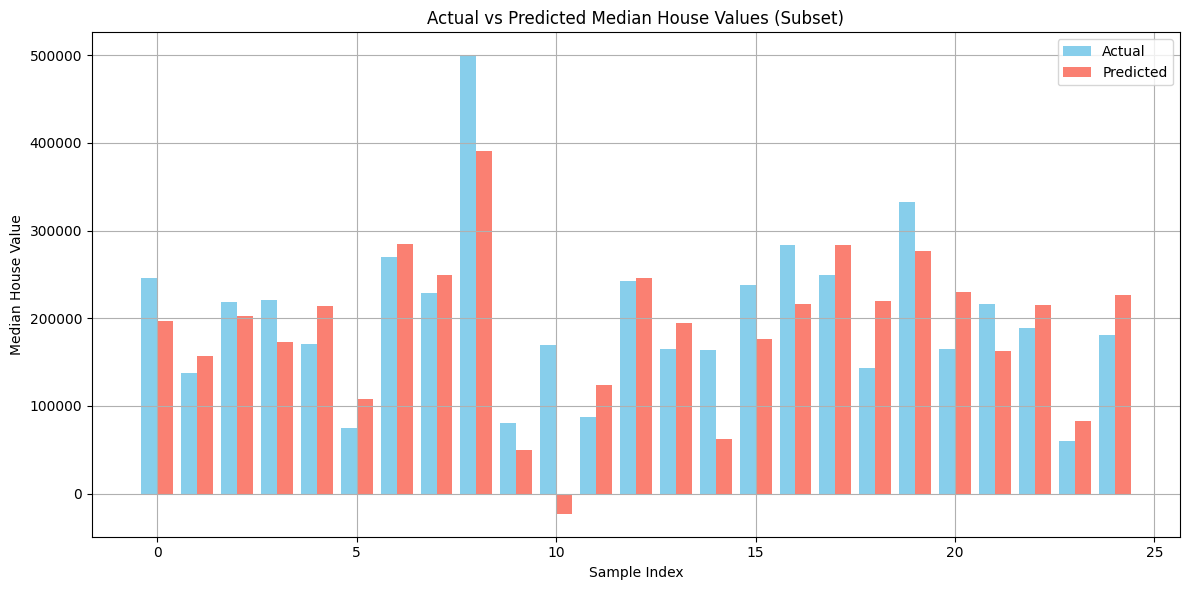

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_test and y_pred are your actual and predicted values
# Select a subset (e.g., first 25 predictions) for better readability
num_samples = 25
indices = np.arange(num_samples)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(indices - 0.2, y_test[:num_samples], 0.4, label='Actual', color='skyblue')
plt.bar(indices + 0.2, y_pred[:num_samples], 0.4, label='Predicted', color='salmon')

plt.title('Actual vs Predicted Median House Values (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


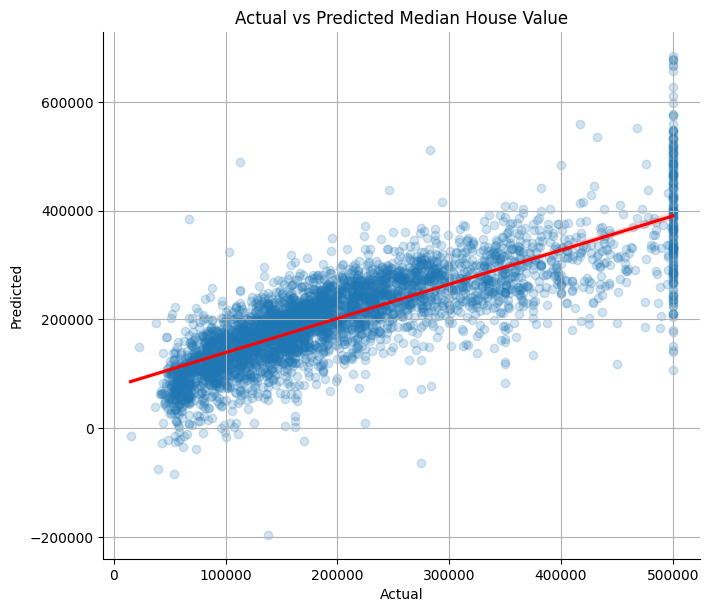

In [107]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot using seaborn's lmplot
sns.lmplot(x='Actual', y='Predicted', data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Median House Value')
plt.grid(True)
plt.show()


In [108]:
# Model Training with XGBoost Regressor
m=XGBRegressor()
m.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [109]:
y_pred=m.predict(X_test)

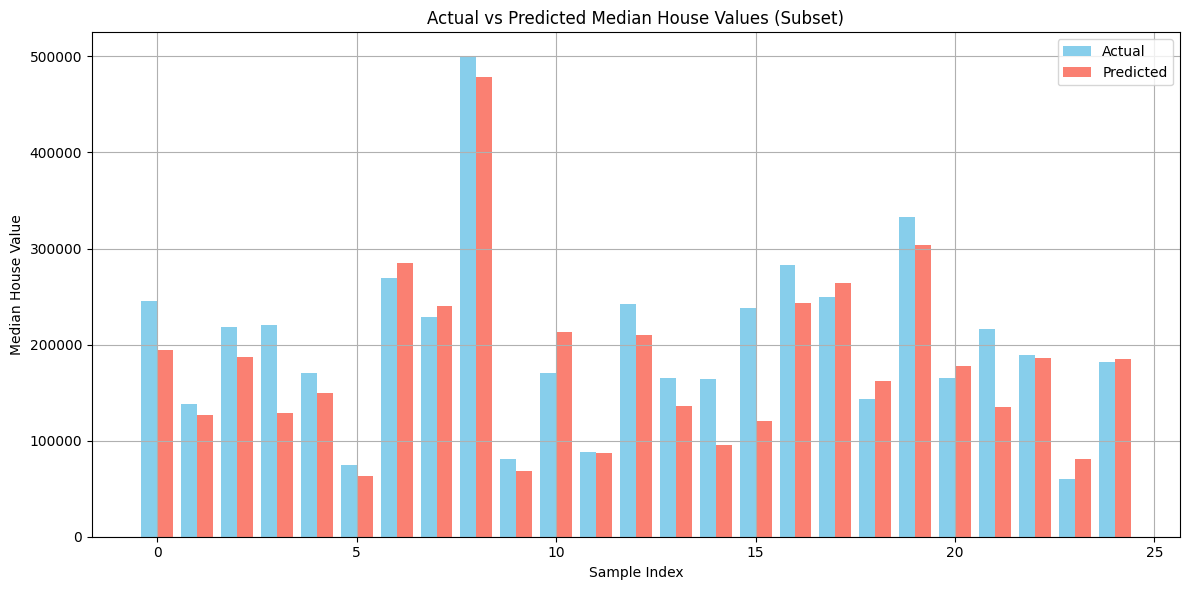

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_test and y_pred are your actual and predicted values
# Select a subset (e.g., first 25 predictions) for better readability
num_samples = 25
indices = np.arange(num_samples)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(indices - 0.2, y_test[:num_samples], 0.4, label='Actual', color='skyblue')
plt.bar(indices + 0.2, y_pred[:num_samples], 0.4, label='Predicted', color='salmon')

plt.title('Actual vs Predicted Median House Values (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


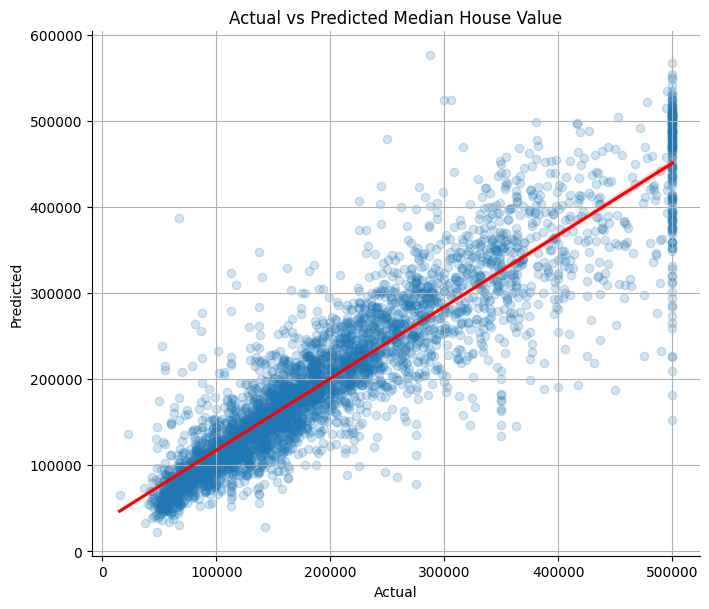

In [114]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot using seaborn's lmplot
sns.lmplot(x='Actual', y='Predicted', data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Median House Value')
plt.grid(True)
plt.show()
